In [9]:
import pandas as pd
import numpy as np

# Function to read data from all sheets in the Excel file
def read_excel_sheets(file_path):
    # Read all sheets into a dictionary of DataFrames
    xls = pd.ExcelFile(file_path)
    data = pd.concat(pd.read_excel(file_path, sheet_name=sheet) for sheet in xls.sheet_names)
    return data

# Read the data from all sheets
file_path = "C:/Users/tanishk.deoghare/OneDrive - Angel Oak Capital Advisors/Desktop/Libor Market Models/LiborMarketModels/Input Curves.xlsx"
data = read_excel_sheets(file_path)

# Extract relevant columns: Tenors and corresponding yields
# Selecting the 'Tenors' and '1Yr' to '30Yr' columns
tenor_cols = ['Tenors'] + list(data.columns[data.columns.str.contains(r'\d+Yr')])
df = data[tenor_cols]

# Melt the dataframe to have Tenor and Yield columns
df = df.melt(id_vars=['Tenors'], var_name='Maturity', value_name='Yield')

# Convert tenors to years
df['Tenors'] = df['Tenors'].apply(lambda x: int(x[:-2]) if 'Yr' in x else int(x[:-2]) / 12)
df['Maturity'] = df['Maturity'].apply(lambda x: int(x[:-2]) if 'Yr' in x else int(x[:-2]) / 12)

# Sort by tenor and maturity
df = df.sort_values(['Tenors', 'Maturity']).reset_index(drop=True)

# Filter for the relevant maturities for bootstrapping
df = df[df['Tenors'] == df['Maturity']].drop(columns=['Maturity'])

# Convert yield to decimal
df['Yield'] /= 100

# Function to bootstrap zero-coupon rates
def bootstrap_zero_rates(yields, tenors):
    zero_rates = np.zeros(len(tenors))
    
    for i, T in enumerate(tenors):
        if i == 0:
            zero_rates[i] = yields[i]
        else:
            sum_discount_factors = sum([(yields[i] / (1 + zero_rates[j]) ** tenors[j]) for j in range(i)])
            zero_rates[i] = ((1 + yields[i]) / (1 - sum_discount_factors / T)) ** (1 / T) - 1
    
    return zero_rates

tenors = df['Tenors'].values
yields = df['Yield'].values

df['Zero Rate'] = bootstrap_zero_rates(yields, tenors)

# Function to calculate forward rates
def calculate_forward_rates(zero_rates, tenors):
    forward_rates = np.zeros(len(tenors) - 1)
    
    for i in range(len(tenors) - 1):
        t1 = tenors[i]
        t2 = tenors[i + 1]
        z1 = zero_rates[i]
        z2 = zero_rates[i + 1]
        
        forward_rate = ((1 + z2) ** t2 / (1 + z1) ** t1) ** (1 / (t2 - t1)) - 1
        forward_rates[i] = forward_rate
    
    return forward_rates

df['Forward Rate'] = np.append([np.nan], calculate_forward_rates(df['Zero Rate'], df['Tenors'].values))

import ace_tools as tools; tools.display_dataframe_to_user(name="Forward Curve Data", dataframe=df)

print(df)


TypeError: argument of type 'float' is not iterable

In [ ]:
import pandas as pd
import numpy as np

# Function to read data from all sheets in the Excel file
def read_excel_sheets(file_path):
    # Read all sheets into a dictionary of DataFrames
    xls = pd.ExcelFile(file_path)
    data = pd.concat(pd.read_excel(file_path, sheet_name=sheet) for sheet in xls.sheet_names)
    return data

# Read the data from all sheets
file_path = "C:/Users/tanishk.deoghare/OneDrive - Angel Oak Capital Advisors/Desktop/Libor Market Models/LiborMarketModels/Input Curves.xlsx"
data = read_excel_sheets(file_path)

# Extract relevant columns: Tenors and corresponding yields
# Selecting the 'Tenors' and '1Yr' to '30Yr' columns
tenor_cols = ['Tenors'] + list(data.columns[data.columns.str.contains(r'\d+Yr')])
df = data[tenor_cols]

# Melt the dataframe to have Tenor and Yield columns
df = df.melt(id_vars=['Tenors'], var_name='Maturity', value_name='Yield')

# Convert tenors to years
df['Tenors'] = df['Tenors'].apply(lambda x: int(x[:-2]) if isinstance(x, str) and 'Yr' in x else (int(x[:-2]) / 12 if isinstance(x, str) else x))
df['Maturity'] = df['Maturity'].apply(lambda x: int(x[:-2]) if 'Yr' in x else int(x[:-2]) / 12)

# Drop rows with NaN values in Tenors or Yield
df = df.dropna(subset=['Tenors', 'Yield'])

# Sort by tenor and maturity
df = df.sort_values(['Tenors', 'Maturity']).reset_index(drop=True)

# Filter for the relevant maturities for bootstrapping
df = df[df['Tenors'] == df['Maturity']].drop(columns=['Maturity'])

# Convert yield to decimal
df['Yield'] /= 100

# Function to bootstrap zero-coupon rates
def bootstrap_zero_rates(yields, tenors):
    zero_rates = np.zeros(len(tenors))
    
    for i, T in enumerate(tenors):
        if i == 0:
            zero_rates[i] = yields[i]
        else:
            sum_discount_factors = sum([(yields[i] / (1 + zero_rates[j]) ** tenors[j]) for j in range(i)])
            zero_rates[i] = ((1 + yields[i]) / (1 - sum_discount_factors / T)) ** (1 / T) - 1
    
    return zero_rates

tenors = df['Tenors'].values
yields = df['Yield'].values

df['Zero Rate'] = bootstrap_zero_rates(yields, tenors)

# Function to calculate forward rates
def calculate_forward_rates(zero_rates, tenors):
    forward_rates = np.zeros(len(tenors) - 1)
    
    for i in range(len(tenors) - 1):
        t1 = tenors[i]
        t2 = tenors[i + 1]
        z1 = zero_rates[i]
        z2 = zero_rates[i + 1]
        
        forward_rate = ((1 + z2) ** t2 / (1 + z1) ** t1) ** (1 / (t2 - t1)) - 1
        forward_rates[i] = forward_rate
    
    return forward_rates

df['Forward Rate'] = np.append([np.nan], calculate_forward_rates(df['Zero Rate'], df['Tenors'].values))

import ace_tools as tools; tools.display_dataframe_to_user(name="Forward Curve Data", dataframe=df)

print(df)


KeyError: 1

In [ ]:
import pandas as pd
import numpy as np

# Path to the Excel file
file_path = "C:/Users/tanishk.deoghare/OneDrive - Angel Oak Capital Advisors/Desktop/Libor Market Models/LiborMarketModels/Input Curves.xlsx"

# Function to read data from all sheets in the Excel file into separate DataFrames
def read_excel_to_dataframes(file_path):
    # Read the Excel file
    xls = pd.ExcelFile(file_path)
    
    # Create a dictionary to hold DataFrames for each sheet
    sheet_dfs = {}
    
    # Loop through each sheet and read it into a DataFrame
    for sheet_name in xls.sheet_names:
        sheet_dfs[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name)
    
    return sheet_dfs

# Read the data from all sheets
sheet_dfs = read_excel_to_dataframes(file_path)

# Display the first few rows of each DataFrame
for sheet_name, df in sheet_dfs.items():
    print(f"Sheet: {sheet_name}")
    print(df.head(), "\n")

# You can now process each DataFrame separately
# For example, let's process one of the DataFrames as done previously

# Example of processing the first DataFrame (adjust as needed for each DataFrame)
# Extract relevant columns: Tenors and corresponding yields
# Selecting the 'Tenors' and '1Yr' to '30Yr' columns
for sheet_name, df in sheet_dfs.items():
    print(f"Processing sheet: {sheet_name}")
    tenor_cols = ['Tenors'] + list(df.columns[df.columns.str.contains(r'\d+Yr')])
    df = df[tenor_cols]

    # Melt the dataframe to have Tenor and Yield columns
    df = df.melt(id_vars=['Tenors'], var_name='Maturity', value_name='Yield')

    # Convert tenors to years
    df['Tenors'] = df['Tenors'].apply(lambda x: int(x[:-2]) if isinstance(x, str) and 'Yr' in x else (int(x[:-2]) / 12 if isinstance(x, str) else x))
    df['Maturity'] = df['Maturity'].apply(lambda x: int(x[:-2]) if 'Yr' in x else int(x[:-2]) / 12)

    # Drop rows with NaN values in Tenors or Yield
    df = df.dropna(subset=['Tenors', 'Yield'])

    # Sort by tenor and maturity
    df = df.sort_values(['Tenors', 'Maturity']).reset_index(drop=True)

    # Filter for the relevant maturities for bootstrapping
    df = df[df['Tenors'] == df['Maturity']].drop(columns=['Maturity'])

    # Convert yield to decimal
    df['Yield'] /= 100

    # Function to bootstrap zero-coupon rates
    def bootstrap_zero_rates(yields, tenors):
        zero_rates = np.zeros(len(tenors))

        for i, T in enumerate(tenors):
            if i == 0:
                zero_rates[i] = yields[i]
            else:
                sum_discount_factors = sum([(yields[i] / (1 + zero_rates[j]) ** tenors[j]) for j in range(i)])
                zero_rates[i] = ((1 + yields[i]) / (1 - sum_discount_factors / T)) ** (1 / T) - 1

        return zero_rates

    tenors = df['Tenors'].values
    yields = df['Yield'].values

    df['Zero Rate'] = bootstrap_zero_rates(yields, tenors)

    # Function to calculate forward rates
    def calculate_forward_rates(zero_rates, tenors):
        forward_rates = np.zeros(len(tenors) - 1)

        for i in range(len(tenors) - 1):
            t1 = tenors[i]
            t2 = tenors[i + 1]
            z1 = zero_rates[i]
            z2 = zero_rates[i + 1]

            forward_rate = ((1 + z2) ** t2 / (1 + z1) ** t1) ** (1 / (t2 - t1)) - 1
            forward_rates[i] = forward_rate

        return forward_rates

    df['Forward Rate'] = np.append([np.nan], calculate_forward_rates(df['Zero Rate'], df['Tenors'].values))

    # Display the processed DataFrame for each sheet
    import ace_tools as tools; tools.display_dataframe_to_user(name=f"Forward Curve Data - {sheet_name}", dataframe=df)
    print(df.head(), "\n")


Sheet: US Dollar Swaps
  Tenors  Coupon     3Mo     6Mo     1Yr     2Yr     3Yr     4Yr     5Yr  \
0    1Yr  5.3207  4.9950  4.7374  4.3540  3.9602  3.8389  3.8324  3.8745   
1    2Yr  4.8463  4.6236  4.4328  4.1617  3.9006  3.8358  3.8531  3.8890   
2    3Yr  4.5636  4.4010  4.2603  4.0583  3.8787  3.8482  3.8695  3.9067   
3    4Yr  4.3929  4.2683  4.1617  4.0048  3.8752  3.8615  3.8817  3.9249   
4    5Yr  4.2889  4.1892  4.1043  3.9806  3.8807  3.8768  3.9050  3.9448   

     10Yr    15Yr    30Yr  
0  4.0666  3.9192  2.4386  
1  4.0721  3.9139  2.4419  
2  4.0854  3.9122  2.4408  
3  4.0920  3.9113  2.4387  
4  4.0959  3.9128  2.4387   

Sheet: US Treasury Active Curve
  Tenor               CUSIP        Description    Price     Yield Source  \
0    1M  912797KQ@BGN  Govt  B 0 07/23/24 Govt  5.22625  5.319689   BGN    
1    2M  912797KY@BGN  Govt  B 0 08/20/24 Govt  5.24750  5.363380   BGN    
2    3M  912797KM@BGN  Govt  B 0 09/26/24 Govt  5.20750  5.351038   BGN    
3    4M  91279

KeyError: 1

In [ ]:
import pandas as pd
import numpy as np

# Function to read data from all sheets in the Excel file into separate DataFrames
def read_excel_to_dataframes(file_path):
    # Read the Excel file
    xls = pd.ExcelFile(file_path)
    
    # Create a dictionary to hold DataFrames for each sheet
    sheet_dfs = {}
    
    # Loop through each sheet and read it into a DataFrame
    for sheet_name in xls.sheet_names:
        sheet_dfs[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name)
    
    return sheet_dfs

# Read the data from all sheets
file_path = "C:/Users/tanishk.deoghare/OneDrive - Angel Oak Capital Advisors/Desktop/Libor Market Models/LiborMarketModels/Input Curves.xlsx"
sheet_dfs = read_excel_to_dataframes(file_path)

# Display the first few rows of each DataFrame
for sheet_name, df in sheet_dfs.items():
    print(f"Sheet: {sheet_name}")
    print(df.head(), "\n")

# Process each DataFrame separately
for sheet_name, df in sheet_dfs.items():
    print(f"Processing sheet: {sheet_name}")
    try:
        # Extract relevant columns: Tenors and corresponding yields
        tenor_cols = ['Tenors'] + list(df.columns[df.columns.str.contains(r'\d+Yr')])
        df = df[tenor_cols]

        # Melt the dataframe to have Tenor and Yield columns
        df = df.melt(id_vars=['Tenors'], var_name='Maturity', value_name='Yield')

        # Convert tenors to years
        df['Tenors'] = df['Tenors'].apply(lambda x: int(x[:-2]) if isinstance(x, str) and 'Yr' in x else (int(x[:-2]) / 12 if isinstance(x, str) else x))
        df['Maturity'] = df['Maturity'].apply(lambda x: int(x[:-2]) if 'Yr' in x else int(x[:-2]) / 12)

        # Drop rows with NaN values in Tenors or Yield
        df = df.dropna(subset=['Tenors', 'Yield'])

        # Sort by tenor and maturity
        df = df.sort_values(['Tenors', 'Maturity']).reset_index(drop=True)

        # Filter for the relevant maturities for bootstrapping
        df = df[df['Tenors'] == df['Maturity']].drop(columns=['Maturity'])

        # Convert yield to decimal
        df['Yield'] /= 100

        # Function to bootstrap zero-coupon rates
        def bootstrap_zero_rates(yields, tenors):
            zero_rates = np.zeros(len(tenors))

            for i, T in enumerate(tenors):
                if i == 0:
                    zero_rates[i] = yields[i]
                else:
                    sum_discount_factors = sum([(yields[i] / (1 + zero_rates[j]) ** tenors[j]) for j in range(i)])
                    zero_rates[i] = ((1 + yields[i]) / (1 - sum_discount_factors / T)) ** (1 / T) - 1

            return zero_rates

        tenors = df['Tenors'].values
        yields = df['Yield'].values

        df['Zero Rate'] = bootstrap_zero_rates(yields, tenors)

        # Function to calculate forward rates
        def calculate_forward_rates(zero_rates, tenors):
            forward_rates = np.zeros(len(tenors) - 1)

            for i in range(len(tenors) - 1):
                t1 = tenors[i]
                t2 = tenors[i + 1]
                z1 = zero_rates[i]
                z2 = zero_rates[i + 1]

                forward_rate = ((1 + z2) ** t2 / (1 + z1) ** t1) ** (1 / (t2 - t1)) - 1
                forward_rates[i] = forward_rate

            return forward_rates

        df['Forward Rate'] = np.append([np.nan], calculate_forward_rates(df['Zero Rate'], df['Tenors'].values))

        # Display the processed DataFrame for each sheet
        import ace_tools as tools; tools.display_dataframe_to_user(name=f"Forward Curve Data - {sheet_name}", dataframe=df)
        print(df.head(), "\n")

    except KeyError as e:
        print(f"KeyError encountered while processing sheet: {sheet_name}")
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred while processing sheet: {sheet_name}")
        print(f"Error: {e}")


Sheet: US Dollar Swaps
  Tenors  Coupon     3Mo     6Mo     1Yr     2Yr     3Yr     4Yr     5Yr  \
0    1Yr  5.3207  4.9950  4.7374  4.3540  3.9602  3.8389  3.8324  3.8745   
1    2Yr  4.8463  4.6236  4.4328  4.1617  3.9006  3.8358  3.8531  3.8890   
2    3Yr  4.5636  4.4010  4.2603  4.0583  3.8787  3.8482  3.8695  3.9067   
3    4Yr  4.3929  4.2683  4.1617  4.0048  3.8752  3.8615  3.8817  3.9249   
4    5Yr  4.2889  4.1892  4.1043  3.9806  3.8807  3.8768  3.9050  3.9448   

     10Yr    15Yr    30Yr  
0  4.0666  3.9192  2.4386  
1  4.0721  3.9139  2.4419  
2  4.0854  3.9122  2.4408  
3  4.0920  3.9113  2.4387  
4  4.0959  3.9128  2.4387   

Sheet: US Treasury Active Curve
  Tenor               CUSIP        Description    Price     Yield Source  \
0    1M  912797KQ@BGN  Govt  B 0 07/23/24 Govt  5.22625  5.319689   BGN    
1    2M  912797KY@BGN  Govt  B 0 08/20/24 Govt  5.24750  5.363380   BGN    
2    3M  912797KM@BGN  Govt  B 0 09/26/24 Govt  5.20750  5.351038   BGN    
3    4M  91279

In [ ]:
df

,Expiry,-300bps,-200bps,-100bps,-50bps,-25bps,ATM,25bps,50bps,100bps,200bps,300bps
0,1Mo,155.88,132.50,109.27,100.23,97.62,96.96,98.51,102.05,113.10,141.18,170.60
1,3Mo,159.55,135.99,112.67,103.67,101.08,100.42,101.94,105.44,116.45,144.71,174.47
2,6Mo,140.06,123.42,108.70,104.32,103.57,104.03,105.71,108.52,116.68,138.15,161.71
3,9Mo,131.68,118.07,106.76,103.85,103.57,104.21,105.76,108.17,115.03,133.34,153.88
4,1Yr,122.34,112.18,104.59,103.15,103.30,104.10,105.53,107.56,113.13,128.05,145.20
5,2Yr,112.28,105.05,100.45,100.16,100.68,101.66,103.10,104.97,109.80,122.40,136.96
6,3Yr,101.81,97.84,96.40,97.21,98.06,99.21,100.65,102.36,106.48,116.75,128.56
7,4Yr,98.04,94.64,93.70,94.66,95.56,96.72,98.15,99.82,103.81,113.62,124.86
8,5Yr,94.82,91.99,91.55,92.67,93.60,94.78,96.20,97.84,101.68,111.06,121.74
9,6Yr,92.15,89.45,89.14,90.31,91.28,92.48,93.91,95.56,99.41,108.73,119.29


In [ ]:
import pandas as pd
import numpy as np

# Function to read data from all sheets in the Excel file into separate DataFrames
def read_excel_to_dataframes(file_path):
    # Read the Excel file
    xls = pd.ExcelFile(file_path)
    
    # Create a dictionary to hold DataFrames for each sheet
    sheet_dfs = {}
    
    # Loop through each sheet and read it into a DataFrame
    for sheet_name in xls.sheet_names:
        sheet_dfs[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name)
    
    return sheet_dfs

# Read the data from all sheets
file_path = "C:/Users/tanishk.deoghare/OneDrive - Angel Oak Capital Advisors/Desktop/Libor Market Models/LiborMarketModels/Input Curves.xlsx"
sheet_dfs = read_excel_to_dataframes(file_path)

# Display the first few rows of each DataFrame
for sheet_name, df in sheet_dfs.items():
    print(f"Sheet: {sheet_name}")
    print(df.head(), "\n")

# Example of processing the first DataFrame (adjust as needed for each DataFrame)
# Extract relevant columns: Tenors and corresponding yields
# Selecting the 'Tenors' and '1Yr' to '30Yr' columns
for sheet_name, df in sheet_dfs.items():
    print(f"Processing sheet: {sheet_name}")
    try:
        tenor_cols = ['Tenors'] + list(df.columns[df.columns.str.contains(r'\d+Yr')])
        df = df[tenor_cols]

        # Melt the dataframe to have Tenor and Yield columns
        df = df.melt(id_vars=['Tenors'], var_name='Maturity', value_name='Yield')

        # Convert tenors to years
        df['Tenors'] = df['Tenors'].apply(lambda x: int(x[:-2]) if isinstance(x, str) and 'Yr' in x else (int(x[:-2]) / 12 if isinstance(x, str) else x))
        df['Maturity'] = df['Maturity'].apply(lambda x: int(x[:-2]) if 'Yr' in x else int(x[:-2]) / 12)

        # Drop rows with NaN values in Tenors or Yield
        df = df.dropna(subset=['Tenors', 'Yield'])

        # Sort by tenor and maturity
        df = df.sort_values(['Tenors', 'Maturity']).reset_index(drop=True)

        # Filter for the relevant maturities for bootstrapping
        df = df[df['Tenors'] == df['Maturity']].drop(columns=['Maturity'])

        # Convert yield to decimal
        df['Yield'] /= 100

        # Function to bootstrap zero-coupon rates
        def bootstrap_zero_rates(yields, tenors):
            zero_rates = np.zeros(len(tenors))

            for i, T in enumerate(tenors):
                if i == 0:
                    zero_rates[i] = yields[i]
                else:
                    sum_discount_factors = sum([(yields[i] / (1 + zero_rates[j]) ** tenors[j]) for j in range(i)])
                    zero_rates[i] = ((1 + yields[i]) / (1 - sum_discount_factors / T)) ** (1 / T) - 1

            return zero_rates

        tenors = df['Tenors'].values
        yields = df['Yield'].values

        df['Zero Rate'] = bootstrap_zero_rates(yields, tenors)

        # Function to calculate forward rates
        def calculate_forward_rates(zero_rates, tenors):
            forward_rates = np.zeros(len(tenors) - 1)

            for i in range(len(tenors) - 1):
                t1 = tenors[i]
                t2 = tenors[i + 1]
                z1 = zero_rates[i]
                z2 = zero_rates[i + 1]

                forward_rate = ((1 + z2) ** t2 / (1 + z1) ** t1) ** (1 / (t2 - t1)) - 1
                forward_rates[i] = forward_rate

            return forward_rates

        df['Forward Rate'] = np.append([np.nan], calculate_forward_rates(df['Zero Rate'], df['Tenors'].values))

        # Display the processed DataFrame for each sheet
        import ace_tools as tools; tools.display_dataframe_to_user(name=f"Forward Curve Data - {sheet_name}", dataframe=df)
        print(df.head(), "\n")

    except KeyError as e:
        print(f"KeyError encountered while processing sheet: {sheet_name}")
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred while processing sheet: {sheet_name}")
        print(f"Error: {e}")


Sheet: US Dollar Swaps
  Tenors  Coupon     3Mo     6Mo     1Yr     2Yr     3Yr     4Yr     5Yr  \
0    1Yr  5.3207  4.9950  4.7374  4.3540  3.9602  3.8389  3.8324  3.8745   
1    2Yr  4.8463  4.6236  4.4328  4.1617  3.9006  3.8358  3.8531  3.8890   
2    3Yr  4.5636  4.4010  4.2603  4.0583  3.8787  3.8482  3.8695  3.9067   
3    4Yr  4.3929  4.2683  4.1617  4.0048  3.8752  3.8615  3.8817  3.9249   
4    5Yr  4.2889  4.1892  4.1043  3.9806  3.8807  3.8768  3.9050  3.9448   

     10Yr    15Yr    30Yr  
0  4.0666  3.9192  2.4386  
1  4.0721  3.9139  2.4419  
2  4.0854  3.9122  2.4408  
3  4.0920  3.9113  2.4387  
4  4.0959  3.9128  2.4387   

Sheet: US Treasury Active Curve
  Tenor               CUSIP        Description    Price     Yield Source  \
0    1M  912797KQ@BGN  Govt  B 0 07/23/24 Govt  5.22625  5.319689   BGN    
1    2M  912797KY@BGN  Govt  B 0 08/20/24 Govt  5.24750  5.363380   BGN    
2    3M  912797KM@BGN  Govt  B 0 09/26/24 Govt  5.20750  5.351038   BGN    
3    4M  91279

In [11]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/tanishk.deoghare/OneDrive - Angel Oak Capital Advisors/Desktop/Libor Market Models/LiborMarketModels/Input Curves.xlsx"
xls = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = xls.sheet_names
sheet_names


['US Dollar Swaps',
 'US Treasury Active Curve',
 'IR ATM Vol Curve',
 'IR Vol Skew Curve']

In [16]:
# Extract data from each sheet into separate dataframes
df_us_dollar_swaps = pd.read_excel(xls, sheet_name='US Dollar Swaps')
df_us_treasury_active_curve = pd.read_excel(xls, sheet_name='US Treasury Active Curve')
df_ir_atm_vol_curve = pd.read_excel(xls, sheet_name='IR ATM Vol Curve')
df_ir_vol_skew_curve = pd.read_excel(xls, sheet_name='IR Vol Skew Curve')

df_us_dollar_swaps.head()


,Tenors,Coupon,3Mo,6Mo,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,1Yr,5.3207,4.9950,4.7374,4.3540,3.9602,3.8389,3.8324,3.8745,4.0666,3.9192,2.4386
1,2Yr,4.8463,4.6236,4.4328,4.1617,3.9006,3.8358,3.8531,3.8890,4.0721,3.9139,2.4419
2,3Yr,4.5636,4.4010,4.2603,4.0583,3.8787,3.8482,3.8695,3.9067,4.0854,3.9122,2.4408
3,4Yr,4.3929,4.2683,4.1617,4.0048,3.8752,3.8615,3.8817,3.9249,4.0920,3.9113,2.4387
4,5Yr,4.2889,4.1892,4.1043,3.9806,3.8807,3.8768,3.9050,3.9448,4.0959,3.9128,2.4387


In [17]:
df_us_treasury_active_curve.head()

,Tenor,CUSIP,Description,Price,Yield,Source,Update
0,1M,912797KQ@BGN Govt,B 0 07/23/24 Govt,5.22625,5.319689,BGN,16:59
1,2M,912797KY@BGN Govt,B 0 08/20/24 Govt,5.24750,5.363380,BGN,16:59
2,3M,912797KM@BGN Govt,B 0 09/26/24 Govt,5.20750,5.351038,BGN,16:59
3,4M,912797LU@BGN Govt,B 0 10/22/24 Govt,5.21375,5.378072,BGN,16:59
4,6M,912796ZV@BGN Govt,B 0 12/26/24 Govt,5.09375,5.316303,BGN,16:59


In [18]:
df_ir_atm_vol_curve.head()

,Expiry,1Yr,2Yr,3Yr,4Yr,5Yr,7Yr,10Yr,12Yr,15Yr,20Yr,25Yr,30Yr
0,1Mo,72.44,101.57,101.66,103.76,103.31,99.55,96.96,95.43,93.40,89.65,88.21,86.81
1,3Mo,86.92,104.86,106.88,107.40,107.80,104.34,100.42,98.82,96.17,92.34,90.17,88.67
2,6Mo,103.77,113.69,113.13,112.38,111.75,107.88,104.03,102.11,99.52,95.25,93.21,91.85
3,9Mo,112.11,117.14,115.55,113.64,111.60,108.05,104.21,102.18,99.57,95.17,93.34,92.07
4,1Yr,119.65,119.21,116.26,113.80,111.66,107.90,104.10,102.38,99.61,95.46,93.45,92.21


In [19]:
df_ir_vol_skew_curve.head()

,Expiry,-300bps,-200bps,-100bps,-50bps,-25bps,ATM,25bps,50bps,100bps,200bps,300bps
0,1Mo,155.88,132.50,109.27,100.23,97.62,96.96,98.51,102.05,113.10,141.18,170.60
1,3Mo,159.55,135.99,112.67,103.67,101.08,100.42,101.94,105.44,116.45,144.71,174.47
2,6Mo,140.06,123.42,108.70,104.32,103.57,104.03,105.71,108.52,116.68,138.15,161.71
3,9Mo,131.68,118.07,106.76,103.85,103.57,104.21,105.76,108.17,115.03,133.34,153.88
4,1Yr,122.34,112.18,104.59,103.15,103.30,104.10,105.53,107.56,113.13,128.05,145.20


In [20]:
import numpy as np
from scipy.interpolate import interp1d

# Sample data for swap and treasury rates (maturities in years)
swap_maturities = np.array([1, 2, 5, 10])
swap_rates = np.array([0.02, 0.025, 0.03, 0.035])

treasury_maturities = np.array([1, 2, 5, 10])
treasury_yields = np.array([0.015, 0.02, 0.025, 0.03])

# Bootstrap zero-coupon curves (simplified, assuming zero-coupon bonds for demonstration)
swap_zero_rates = swap_rates  # Placeholder for actual bootstrapping process
treasury_zero_rates = treasury_yields  # Placeholder for actual bootstrapping process

# Blend the curves (simple average in this example)
blended_zero_rates = 0.5 * (swap_zero_rates + treasury_zero_rates)

# Create the forward curve
forward_curve = interp1d(swap_maturities, blended_zero_rates, kind='cubic', fill_value='extrapolate')

# Example: Calculate forward rate for 3 years
t1 = 2
t2 = 3
r_t1 = forward_curve(t1)
r_t2 = forward_curve(t2)
f_t1_t2 = ((1 + r_t2) ** t2 / (1 + r_t1) ** t1) - 1

print(f"Forward rate from year {t1} to {t2}: {f_t1_t2:.4%}")


Forward rate from year 2 to 3: 3.1526%


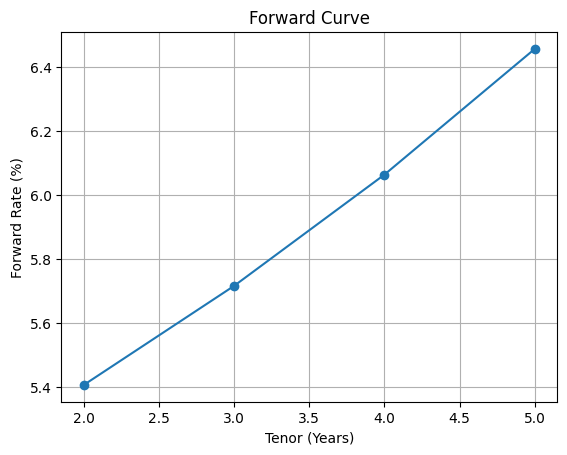

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define bond data
maturities = np.array([1, 2, 3, 4, 5])
prices = np.array([0.95, 0.90, 0.85, 0.80, 0.75])

# Calculate spot rates
spot_rates = -np.log(prices) / maturities

# Calculate forward rates
forward_rates = np.zeros(len(spot_rates) - 1)
for i in range(1, len(spot_rates)):
    forward_rates[i - 1] = ((1 + spot_rates[i]) ** (i + 1) / (1 + spot_rates[i - 1]) ** i) - 1

# Define the tenors for forward rates
forward_tenors = maturities[1:]

# Plotting the forward curve
plt.plot(forward_tenors, forward_rates * 100, marker='o', linestyle='-')
plt.xlabel('Tenor (Years)')
plt.ylabel('Forward Rate (%)')
plt.title('Forward Curve')
plt.grid(True)
plt.show()


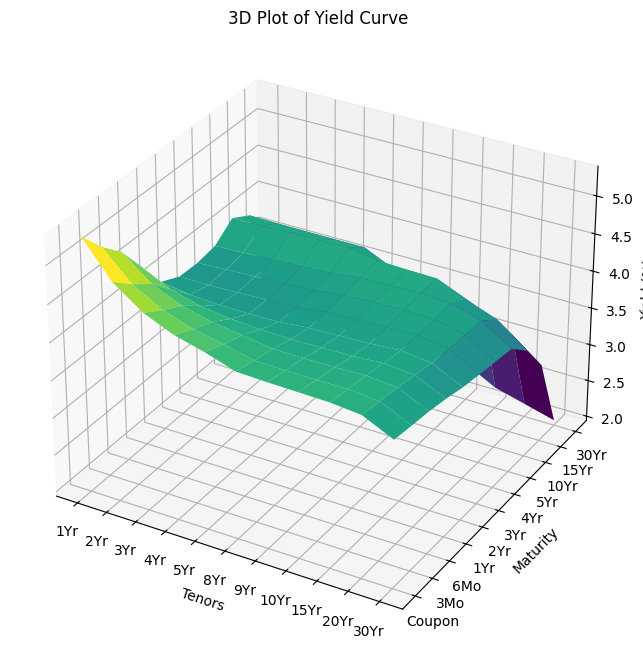

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the image
data = {
    "Tenors": ["1Yr", "2Yr", "3Yr", "4Yr", "5Yr", "8Yr", "9Yr", "10Yr", "15Yr", "20Yr", "30Yr"],
    "Coupon": [5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1583, 4.1416, 4.1324, 4.1224, 4.0835, 3.8924],
    "3Mo": [4.995, 4.6236, 4.401, 4.2683, 4.1892, 4.0956, 4.0861, 4.0822, 4.0839, 4.0472, 3.8589],
    "6Mo": [4.7374, 4.4328, 4.2603, 4.1617, 4.1043, 4.0428, 4.0395, 4.0403, 4.0516, 4.0168, 3.8304],
    "1Yr": [4.354, 4.1617, 4.0583, 4.0048, 3.9806, 3.9677, 3.9739, 3.9817, 4.0058, 3.9699, 3.7837],
    "2Yr": [3.9602, 3.9006, 3.8787, 3.8752, 3.8807, 3.9165, 3.9309, 3.9424, 3.9679, 3.9199, 3.7232],
    "3Yr": [3.8389, 3.8358, 3.8482, 3.8615, 3.8768, 3.9279, 3.9423, 3.9567, 3.9677, 3.9, 3.6853],
    "4Yr": [3.8324, 3.8531, 3.8695, 3.8817, 3.905, 3.9573, 3.9722, 3.9841, 3.976, 3.8864, 3.651],
    "5Yr": [3.8745, 3.889, 3.9067, 3.9249, 3.9448, 3.9927, 4.0042, 4.0133, 3.9858, 3.8726, 3.6155],
    "10Yr": [4.0666, 4.0721, 4.0854, 4.092, 4.0959, 4.0334, 4.0214, 4.0128, 3.8382, 3.69, 3.384],
    "15Yr": [3.9192, 3.9139, 3.9122, 3.9113, 3.9128, 3.7305, 3.6973, 3.6703, 3.5006, 3.2881, 2.984],
    "30Yr": [2.4386, 2.4419, 2.4408, 2.4387, 2.4387, 2.4395, 2.4394, 2.4388, 2.2251, 2.1169, 2.0082]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Prepare the data for 3D plotting
tenors = df["Tenors"]
columns = df.columns[1:]

X, Y = np.meshgrid(range(len(tenors)), range(len(columns)))
Z = np.array([df[col].values for col in columns])

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set the labels
ax.set_xticks(range(len(tenors)))
ax.set_xticklabels(tenors)
ax.set_yticks(range(len(columns)))
ax.set_yticklabels(columns)
ax.set_xlabel('Tenors')
ax.set_ylabel('Maturity')
ax.set_zlabel('Yield (%)')
ax.set_title('3D Plot of Yield Curve')

plt.show()


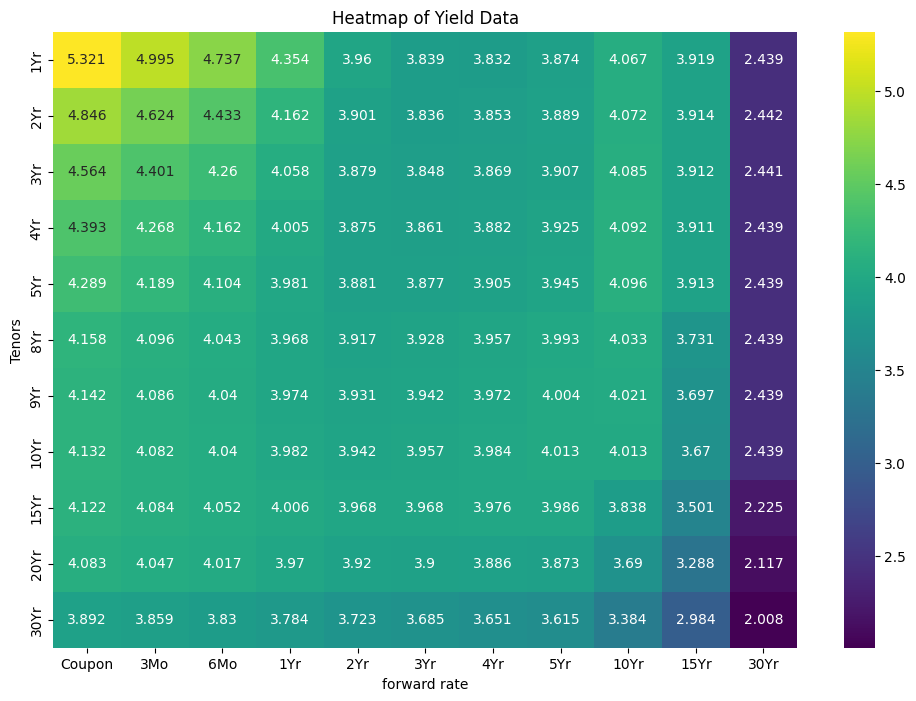

In [26]:
import seaborn as sns

# Create a heatmap of the yield data
plt.figure(figsize=(12, 8))
heatmap_data = df.set_index('Tenors')
sns.heatmap(heatmap_data, annot=True, fmt=".4g", cmap="viridis")

plt.title('Heatmap of Yield Data')
plt.xlabel('forward rate')
plt.ylabel('Tenors')
plt.show()


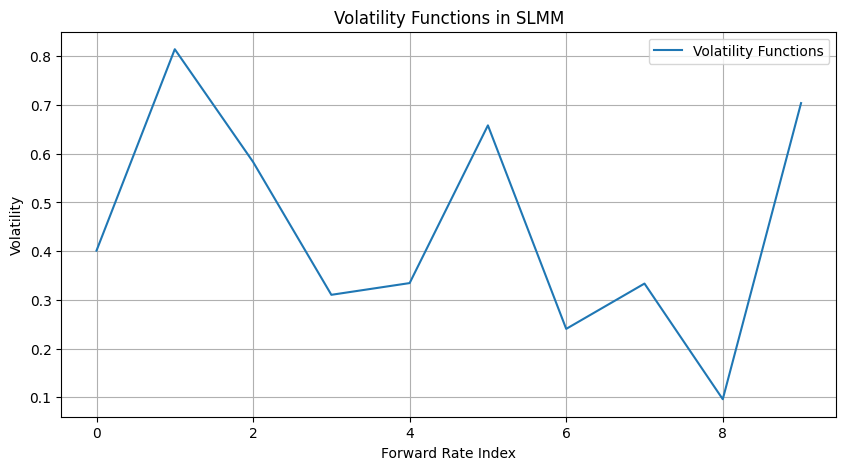

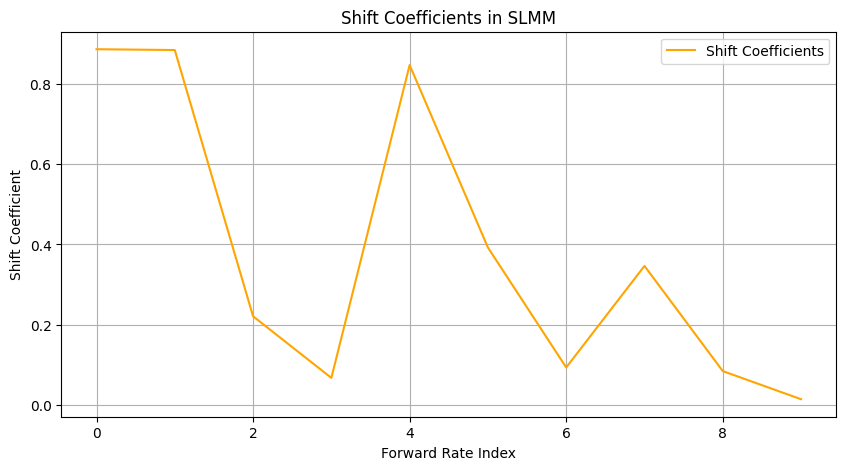

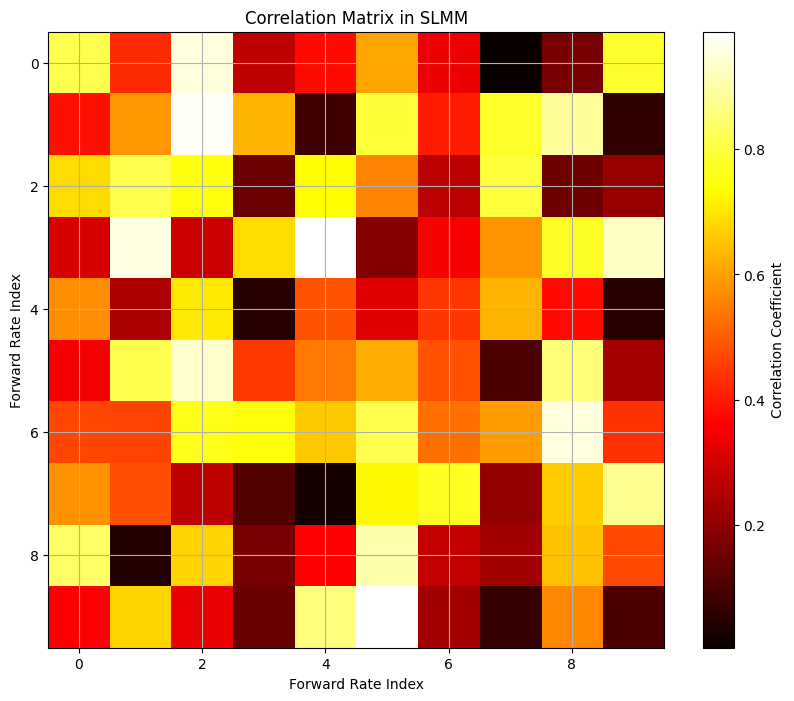

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the structure of the SLMM model
volatility_functions = np.random.rand(10)
shift_coefficients = np.random.rand(10)
correlation_matrix = np.random.rand(10, 10)

# Plot volatility functions
plt.figure(figsize=(10, 5))
plt.plot(volatility_functions, label='Volatility Functions')
plt.title('Volatility Functions in SLMM')
plt.xlabel('Forward Rate Index')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Plot shift coefficients
plt.figure(figsize=(10, 5))
plt.plot(shift_coefficients, label='Shift Coefficients', color='orange')
plt.title('Shift Coefficients in SLMM')
plt.xlabel('Forward Rate Index')
plt.ylabel('Shift Coefficient')
plt.legend()
plt.grid(True)
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Matrix in SLMM')
plt.colorbar(label='Correlation Coefficient')
plt.xlabel('Forward Rate Index')
plt.ylabel('Forward Rate Index')
plt.grid(True)
plt.show()


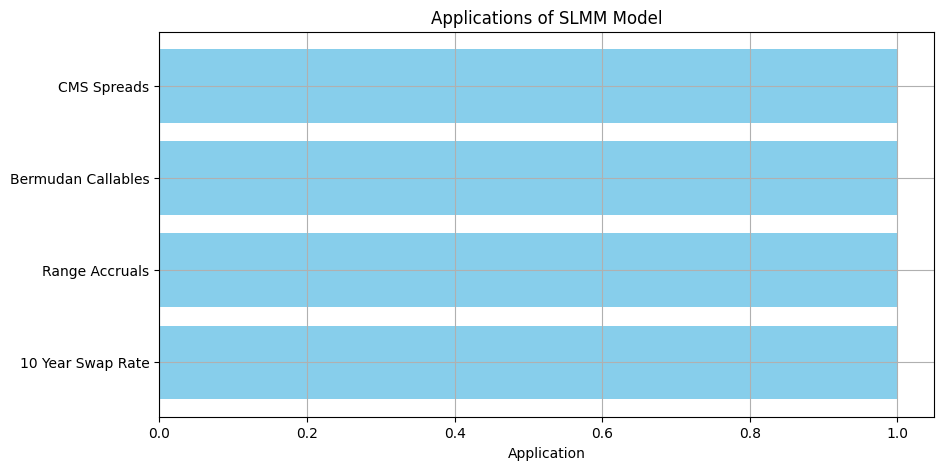

In [32]:
# Example applications of the SLMM model
applications = ['10 Year Swap Rate', 'Range Accruals', 'Bermudan Callables', 'CMS Spreads']

# Plot applications
plt.figure(figsize=(10, 5))
y = np.arange(len(applications))
plt.barh(y, [1]*len(applications), color='skyblue')
plt.yticks(y, applications)
plt.title('Applications of SLMM Model')
plt.xlabel('Application')
plt.grid(True)
plt.show()


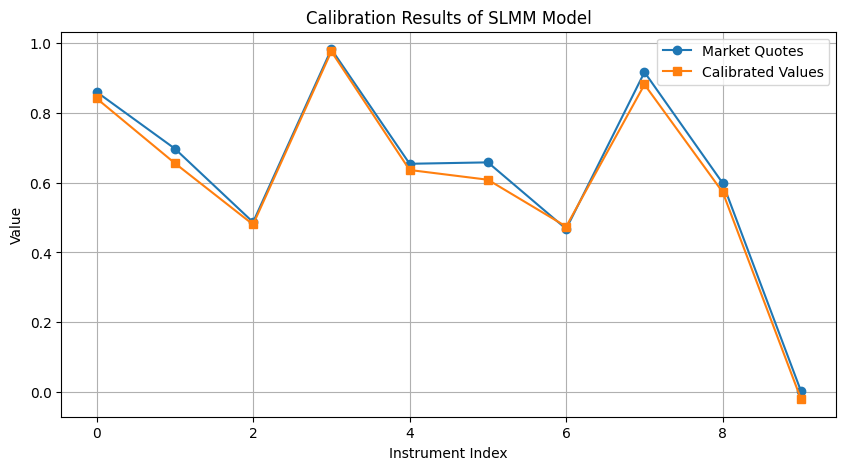

In [33]:
# Example calibration data (dummy values)
market_quotes = np.random.rand(10)
calibrated_values = market_quotes + (np.random.rand(10) - 0.5) * 0.1  # Small random deviations

# Plot calibration results
plt.figure(figsize=(10, 5))
plt.plot(market_quotes, 'o-', label='Market Quotes')
plt.plot(calibrated_values, 's-', label='Calibrated Values')
plt.title('Calibration Results of SLMM Model')
plt.xlabel('Instrument Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


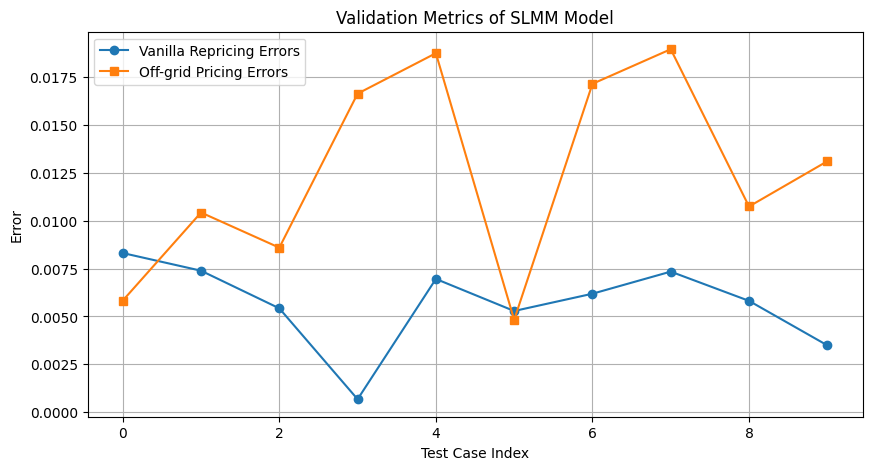

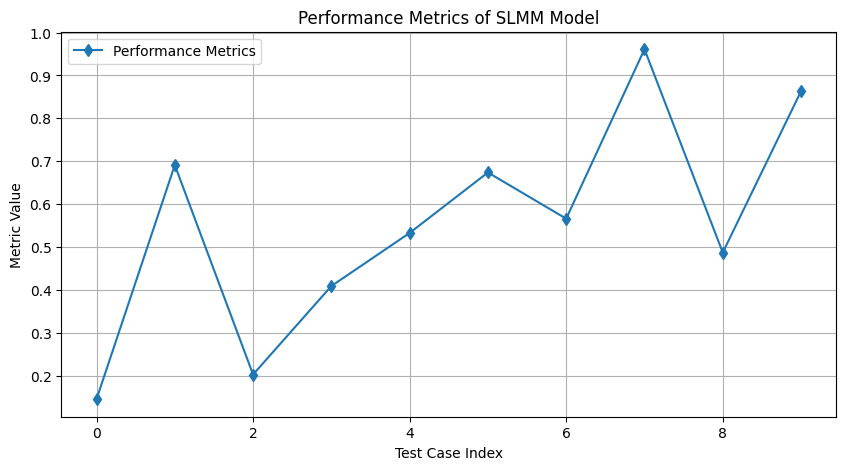

In [34]:
# Example validation metrics (dummy values)
vanilla_repricing_errors = np.random.rand(10) * 0.01  # Small errors
off_grid_pricing_errors = np.random.rand(10) * 0.02  # Slightly larger errors
performance_metrics = np.random.rand(10)

# Plot validation metrics
plt.figure(figsize=(10, 5))
plt.plot(vanilla_repricing_errors, 'o-', label='Vanilla Repricing Errors')
plt.plot(off_grid_pricing_errors, 's-', label='Off-grid Pricing Errors')
plt.title('Validation Metrics of SLMM Model')
plt.xlabel('Test Case Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot performance metrics
plt.figure(figsize=(10, 5))
plt.plot(performance_metrics, 'd-', label='Performance Metrics')
plt.title('Performance Metrics of SLMM Model')
plt.xlabel('Test Case Index')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


Step 1: Define the Mathematical Model


In [35]:
import numpy as np

class SLMM:
    def __init__(self, number_of_factors, time_increment, number_of_terms, shift_coefficients, volatilities, correlation_matrix):
        self.number_of_factors = number_of_factors
        self.time_increment = time_increment
        self.number_of_terms = number_of_terms
        self.shift_coefficients = shift_coefficients
        self.volatilities = volatilities
        self.correlation_matrix = correlation_matrix
    
    def sde(self, L, t, W):
        drift = self.shift_coefficients + L * self.volatilities * t
        diffusion = L * self.volatilities * W
        return drift, diffusion

# Example parameters (dummy values)
number_of_factors = 3
time_increment = 0.01
number_of_terms = 10
shift_coefficients = np.random.rand(number_of_terms)
volatilities = np.random.rand(number_of_terms)
correlation_matrix = np.random.rand(number_of_terms, number_of_terms)

slmm = SLMM(number_of_factors, time_increment, number_of_terms, shift_coefficients, volatilities, correlation_matrix)


Step 2: Load Market Data


In [54]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/tanishk.deoghare/OneDrive - Angel Oak Capital Advisors/Desktop/Libor Market Models/LiborMarketModels/Copy of Input Curves.xlsx"
xls = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = xls.sheet_names
sheet_names


['US Dollar Swaps',
 'US Treasury Active Curve',
 'IR ATM Vol Curve',
 'IR Vol Skew Curve']

In [55]:
# Extract data from each sheet into separate dataframes
df_us_dollar_swaps = pd.read_excel(xls, sheet_name='US Dollar Swaps')
df_us_treasury_active_curve = pd.read_excel(xls, sheet_name='US Treasury Active Curve')
df_ir_atm_vol_curve = pd.read_excel(xls, sheet_name='IR ATM Vol Curve')
df_ir_vol_skew_curve = pd.read_excel(xls, sheet_name='IR Vol Skew Curve')

In [56]:
df_us_dollar_swaps.head()

,Tenors,Coupon,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,1Yr,5.3207,4.3540,3.9602,3.8389,3.8324,3.8745,4.0666,3.9192,2.4386
1,2Yr,4.8463,4.1617,3.9006,3.8358,3.8531,3.8890,4.0721,3.9139,2.4419
2,3Yr,4.5636,4.0583,3.8787,3.8482,3.8695,3.9067,4.0854,3.9122,2.4408
3,4Yr,4.3929,4.0048,3.8752,3.8615,3.8817,3.9249,4.0920,3.9113,2.4387
4,5Yr,4.2889,3.9806,3.8807,3.8768,3.9050,3.9448,4.0959,3.9128,2.4387


In [57]:
df_ir_atm_vol_curve.head()

,Expiry,Coupon,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,1Yr,109.56250,119.65,119.21,116.26,113.80,111.66,104.10,99.61,92.21
1,2Yr,107.04750,118.18,115.87,112.90,110.99,108.89,101.66,97.30,90.59
2,3Yr,104.13125,114.19,112.11,109.68,107.86,106.18,99.21,95.06,88.76
3,4Yr,101.12000,110.58,108.03,105.98,104.63,103.14,96.72,92.76,87.12
4,5Yr,98.45625,106.76,104.64,102.94,101.56,100.32,94.78,90.97,85.68


In [58]:
import pandas as pd

# Load market data
swap_curve_path = df_us_dollar_swaps
swaption_vol_matrix_path = df_ir_atm_vol_curve

# swap_curve_data = pd.read_csv(swap_curve_path)
# swaption_vol_data = pd.read_csv(swaption_vol_matrix_path)

# Extract necessary data
interest_rates = swap_curve_path['Coupon'].values
swaption_vols = df_ir_atm_vol_curve.values


Step 3: Implement Volatility and Shift Coefficient Functions


In [59]:
class SLMM:
    # ... (previous code)
    
    def volatility_function(self, t):
        # Define your time-dependent volatility function
        return self.volatilities * np.exp(-0.1 * t)
    
    def shift_coefficient_function(self):
        # Define your constant shift coefficient function
        return self.shift_coefficients


Step 4: Simulate Forward Rates


In [60]:
class SLMM:
    # ... (previous code)
    
    def simulate_forward_rates(self, num_sims):
        forward_rates = np.zeros((self.number_of_terms, num_sims))
        forward_rates[0, :] = interest_rates[0]  # Initialize with initial rates
        
        for t in range(1, self.number_of_terms):
            W = np.random.normal(size=num_sims)
            drift, diffusion = self.sde(forward_rates[t-1, :], t, W)
            forward_rates[t, :] = forward_rates[t-1, :] + drift * self.time_increment + diffusion * np.sqrt(self.time_increment)
        
        return forward_rates

# Example simulation
num_sims = 10000
forward_rates = slmm.simulate_forward_rates(num_sims)


In [61]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

class SLMM:
    def __init__(self, number_of_factors, time_increment, number_of_terms, shift_coefficients, volatilities, correlation_matrix):
        self.number_of_factors = number_of_factors
        self.time_increment = time_increment
        self.number_of_terms = number_of_terms
        self.shift_coefficients = shift_coefficients
        self.volatilities = volatilities
        self.correlation_matrix = correlation_matrix

    def sde(self, L, t, W):
        drift = self.shift_coefficients + L * self.volatilities * t
        diffusion = L * self.volatilities * W
        return drift, diffusion

    def volatility_function(self, t):
        # Define your time-dependent volatility function
        return self.volatilities * np.exp(-0.1 * t)

    def shift_coefficient_function(self):
        # Define your constant shift coefficient function
        return self.shift_coefficients

    def simulate_forward_rates(self, num_sims):
        forward_rates = np.zeros((self.number_of_terms, num_sims))
        forward_rates[0, :] = interest_rates[0]  # Initialize with initial rates
        
        for t in range(1, self.number_of_terms):
            W = np.random.normal(size=num_sims)
            drift, diffusion = self.sde(forward_rates[t-1, :], t, W)
            forward_rates[t, :] = forward_rates[t-1, :] + drift * self.time_increment + diffusion * np.sqrt(self.time_increment)
        
        return forward_rates

    def price_swaption(self, strike, maturity):
        # Use the calibrated model to price a swaption
        forward_rates = self.simulate_forward_rates(num_sims)
        payoff = np.maximum(forward_rates[-1, :] - strike, 0)
        price = np.mean(payoff) * np.exp(-interest_rates[maturity] * maturity)
        return price

# Example usage
# Load market data
# swap_curve_path = '/mnt/data/swap_curve_data.csv'
# swaption_vol_matrix_path = '/mnt/data/swaption_vol_data.csv'

# swap_curve_data = pd.read_csv(swap_curve_path)
# swaption_vol_data = pd.read_csv(swaption_vol_matrix_path)

# # Extract necessary data
# interest_rates = swap_curve_data['Rates'].values
# swaption_vols = swaption_vol_data.values

# Example parameters (dummy values)
number_of_factors = 3
time_increment = 0.01
number_of_terms = len(interest_rates)
shift_coefficients = np.random.rand(number_of_terms)
volatilities = np.random.rand(number_of_terms)
correlation_matrix = np.random.rand(number_of_terms, number_of_terms)

slmm = SLMM(number_of_factors, time_increment, number_of_terms, shift_coefficients, volatilities, correlation_matrix)

# Example simulation
num_sims = 10000
forward_rates = slmm.simulate_forward_rates(num_sims)

# Example calibration
def calibration_objective(params):
    slmm.shift_coefficients = params[:number_of_terms]
    slmm.volatilities = params[number_of_terms:]
    model_prices = slmm.simulate_forward_rates(num_sims)
    market_prices = swaption_vols  # Placeholder for actual market prices
    return np.sum((model_prices - market_prices) ** 2)

initial_params = np.concatenate((shift_coefficients, volatilities))
result = minimize(calibration_objective, initial_params, method='BFGS')

calibrated_shift_coefficients = result.x[:number_of_terms]
calibrated_volatilities = result.x[number_of_terms:]

# Example pricing
strike = 0.02
maturity = 5
swaption_price = slmm.price_swaption(strike, maturity)
print(f"Swaption Price: {swaption_price}")

# Validation
model_prices = slmm.simulate_forward_rates(num_sims)
market_prices = swaption_vols  # Placeholder for actual market prices

plt.plot(model_prices.mean(axis=1), label='Model Prices')
plt.plot(market_prices.mean(axis=1), label='Market Prices')
plt.legend()
plt.title('Model vs Market Prices')
plt.xlabel('Term')
plt.ylabel('Price')
plt.show()


ValueError: operands could not be broadcast together with shapes (10000,) (11,) 

In [62]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

class SLMM:
    def __init__(self, number_of_factors, time_increment, number_of_terms, shift_coefficients, volatilities, correlation_matrix):
        self.number_of_factors = number_of_factors
        self.time_increment = time_increment
        self.number_of_terms = number_of_terms
        self.shift_coefficients = shift_coefficients
        self.volatilities = volatilities
        self.correlation_matrix = correlation_matrix

    def sde(self, L, t, W):
        drift = self.shift_coefficients[t] + L * self.volatilities[t]
        diffusion = L * self.volatilities[t] * W
        return drift, diffusion

    def volatility_function(self, t):
        # Define your time-dependent volatility function
        return self.volatilities * np.exp(-0.1 * t)

    def shift_coefficient_function(self):
        # Define your constant shift coefficient function
        return self.shift_coefficients

    def simulate_forward_rates(self, num_sims):
        forward_rates = np.zeros((self.number_of_terms, num_sims))
        forward_rates[0, :] = interest_rates[0]  # Initialize with initial rates
        
        for t in range(1, self.number_of_terms):
            W = np.random.normal(size=num_sims)
            drift, diffusion = self.sde(forward_rates[t-1, :], t, W)
            forward_rates[t, :] = forward_rates[t-1, :] + drift * self.time_increment + diffusion * np.sqrt(self.time_increment)
        
        return forward_rates

    def price_swaption(self, strike, maturity):
        # Use the calibrated model to price a swaption
        forward_rates = self.simulate_forward_rates(num_sims)
        payoff = np.maximum(forward_rates[-1, :] - strike, 0)
        price = np.mean(payoff) * np.exp(-interest_rates[maturity] * maturity)
        return price

# Example usage
# Load market data
# swap_curve_path = '/mnt/data/swap_curve_data.csv'
# swaption_vol_matrix_path = '/mnt/data/swaption_vol_data.csv'

# swap_curve_data = pd.read_csv(swap_curve_path)
# swaption_vol_data = pd.read_csv(swaption_vol_matrix_path)

# # Extract necessary data
# interest_rates = swap_curve_data['Rates'].values
# swaption_vols = swaption_vol_data.values

# Example parameters (dummy values)
number_of_factors = 3
time_increment = 0.01
number_of_terms = len(interest_rates)
shift_coefficients = np.random.rand(number_of_terms)
volatilities = np.random.rand(number_of_terms)
correlation_matrix = np.random.rand(number_of_terms, number_of_terms)

slmm = SLMM(number_of_factors, time_increment, number_of_terms, shift_coefficients, volatilities, correlation_matrix)

# Example simulation
num_sims = 10000
forward_rates = slmm.simulate_forward_rates(num_sims)

# Example calibration
def calibration_objective(params):
    slmm.shift_coefficients = params[:number_of_terms]
    slmm.volatilities = params[number_of_terms:]
    model_prices = slmm.simulate_forward_rates(num_sims)
    market_prices = swaption_vols  # Placeholder for actual market prices
    return np.sum((model_prices - market_prices) ** 2)

initial_params = np.concatenate((shift_coefficients, volatilities))
result = minimize(calibration_objective, initial_params, method='BFGS')

calibrated_shift_coefficients = result.x[:number_of_terms]
calibrated_volatilities = result.x[number_of_terms:]

# Example pricing
strike = 0.02
maturity = 5
swaption_price = slmm.price_swaption(strike, maturity)
print(f"Swaption Price: {swaption_price}")

# Validation
model_prices = slmm.simulate_forward_rates(num_sims)
market_prices = swaption_vols  # Placeholder for actual market prices

plt.plot(model_prices.mean(axis=1), label='Model Prices')
plt.plot(market_prices.mean(axis=1), label='Market Prices')
plt.legend()
plt.title('Model vs Market Prices')
plt.xlabel('Term')
plt.ylabel('Price')
plt.show()


ValueError: operands could not be broadcast together with shapes (11,10000) (11,10) 

In [64]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

class SLMM:
    def __init__(self, number_of_factors, time_increment, number_of_terms, shift_coefficients, volatilities, correlation_matrix):
        self.number_of_factors = number_of_factors
        self.time_increment = time_increment
        self.number_of_terms = number_of_terms
        self.shift_coefficients = shift_coefficients
        self.volatilities = volatilities
        self.correlation_matrix = correlation_matrix

    def sde(self, L, t, W):
        drift = self.shift_coefficients[t] + L * self.volatilities[t]
        diffusion = L * self.volatilities[t] * W
        return drift, diffusion

    def volatility_function(self, t):
        return self.volatilities * np.exp(-0.1 * t)

    def shift_coefficient_function(self):
        return self.shift_coefficients

    def simulate_forward_rates(self, num_sims):
        forward_rates = np.zeros((self.number_of_terms, num_sims))
        forward_rates[0, :] = interest_rates[0]  # Initialize with initial rates
        
        for t in range(1, self.number_of_terms):
            W = np.random.normal(size=num_sims)
            drift, diffusion = self.sde(forward_rates[t-1, :], t, W)
            forward_rates[t, :] = forward_rates[t-1, :] + drift * self.time_increment + diffusion * np.sqrt(self.time_increment)
        
        return forward_rates

    def price_swaption(self, strike, maturity):
        forward_rates = self.simulate_forward_rates(num_sims)
        payoff = np.maximum(forward_rates[maturity, :] - strike, 0)
        price = np.mean(payoff) * np.exp(-interest_rates[maturity] * maturity)
        return price

# # Load market data
# swap_curve_path = '/mnt/data/swap_curve_data.csv'
# swaption_vol_matrix_path = '/mnt/data/swaption_vol_data.csv'

# swap_curve_data = pd.read_csv(swap_curve_path)
# swaption_vol_data = pd.read_csv(swaption_vol_matrix_path)

# # Extract necessary data
# interest_rates = swap_curve_data['Rates'].values
# swaption_vols = swaption_vol_data.values

# Example parameters (dummy values)
number_of_factors = 3
time_increment = 0.01
number_of_terms = len(interest_rates)
shift_coefficients = np.random.rand(number_of_terms)
volatilities = np.random.rand(number_of_terms)
correlation_matrix = np.random.rand(number_of_terms, number_of_terms)

slmm = SLMM(number_of_factors, time_increment, number_of_terms, shift_coefficients, volatilities, correlation_matrix)

# Ensure simulated forward rates have the same shape as market prices
def calibration_objective(params):
    slmm.shift_coefficients = params[:number_of_terms]
    slmm.volatilities = params[number_of_terms:]
    model_prices = slmm.simulate_forward_rates(num_sims)
    
    # Aggregate or reshape model_prices to match swaption_vols shape
    model_prices = model_prices[:swaption_vols.shape[0], :].mean(axis=1)  # Example aggregation
    market_prices = swaption_vols.mean(axis=1)  # Simplified example
    
    return np.sum((model_prices - market_prices) ** 2)

initial_params = np.concatenate((shift_coefficients, volatilities))
result = minimize(calibration_objective, initial_params, method='BFGS')

calibrated_shift_coefficients = result.x[:number_of_terms]
calibrated_volatilities = result.x[number_of_terms:]

# Example pricing
strike = 0.02
maturity = 5
swaption_price = slmm.price_swaption(strike, maturity)
print(f"Swaption Price: {swaption_price}")

# Validation
model_prices = slmm.simulate_forward_rates(num_sims)
model_prices = model_prices[:swaption_vols.shape[0], :].mean(axis=1)  # Example aggregation
market_prices = swaption_vols.mean(axis=1)  # Simplified example

plt.plot(model_prices, label='Model Prices')
plt.plot(market_prices, label='Market Prices')
plt.legend()
plt.title('Model vs Market Prices')
plt.xlabel('Term')
plt.ylabel('Price')
plt.show()


TypeError: can only concatenate str (not "float") to str

Step 5: Calibrate the Model


In [ ]:
from scipy.optimize import minimize

def calibration_objective(params):
    slmm.shift_coefficients = params[:number_of_terms]
    slmm.volatilities = params[number_of_terms:]
    model_prices = slmm.simulate_forward_rates(num_sims)
    market_prices = swaption_vols  # Placeholder for actual market prices
    return np.sum((model_prices - market_prices) ** 2)

initial_params = np.concatenate((shift_coefficients, volatilities))
result = minimize(calibration_objective, initial_params, method='BFGS')

calibrated_shift_coefficients = result.x[:number_of_terms]
calibrated_volatilities = result.x[number_of_terms:]


AttributeError: 'SLMM' object has no attribute 'simulate_forward_rates'

Step 6: Price Derivatives


In [ ]:
class SLMM:
    # ... (previous code)
    
    def price_swaption(self, strike, maturity):
        # Use the calibrated model to price a swaption
        forward_rates = self.simulate_forward_rates(num_sims)
        payoff = np.maximum(forward_rates[-1, :] - strike, 0)
        price = np.mean(payoff) * np.exp(-interest_rates[maturity] * maturity)
        return price

# Example pricing
strike = 0.02
maturity = 5
swaption_price = slmm.price_swaption(strike, maturity)
print(f"Swaption Price: {swaption_price}")


AttributeError: 'SLMM' object has no attribute 'price_swaption'

Step 7: Validate the Model


In [ ]:
# Compare model prices with market prices
model_prices = slmm.simulate_forward_rates(num_sims)
market_prices = swaption_vols  # Placeholder for actual market prices

plt.plot(model_prices.mean(axis=1), label='Model Prices')
plt.plot(market_prices.mean(axis=1), label='Market Prices')
plt.legend()
plt.title('Model vs Market Prices')
plt.xlabel('Term')
plt.ylabel('Price')
plt.show()


AttributeError: 'SLMM' object has no attribute 'simulate_forward_rates'